In [6]:
from data_processing import *

# Example Data

## Address:

* Why the log2 transform is required?
* Which thresholds should be set to define the 'credible' regulatory sites?

In [7]:
pho_EGFR = pd.read_csv('data/all.EGFR.csv')
pho_FGFR = pd.read_csv('data/all.FGFR.csv')

Text(0.5, 1.0, 'pho_FGFR stimulated by FGF7 and FGF10')

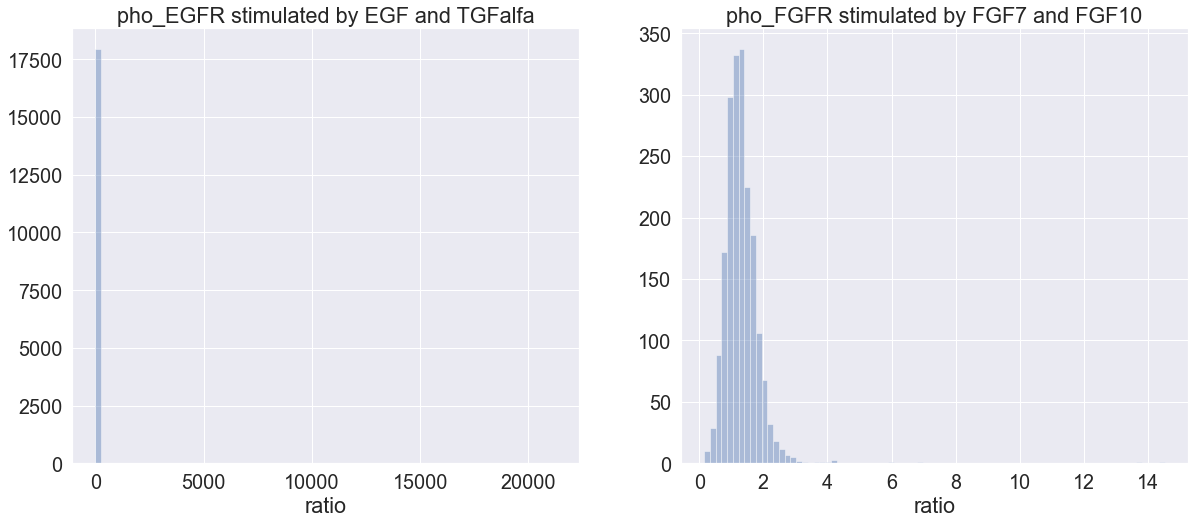

In [8]:
%matplotlib inline
plt.subplots(figsize = (20, 8))
sns.set(font_scale = 1.8)

plot_pho_EGFR = pho_EGFR.melt(
    id_vars = ['id', 'cl', 'ligand'], var_name = 'time', value_name = 'ratio')
plt.subplot(121)
sns.distplot(plot_pho_EGFR['ratio'], hist=True, kde=False, 
             bins=80)
plt.title('pho_EGFR stimulated by EGF and TGFalfa')

plot_pho_FGFR = pho_FGFR.melt(
    id_vars = ['id', 'cl', 'ligand'], var_name = 'time', value_name = 'ratio')
plt.subplot(122)
sns.distplot(plot_pho_FGFR['ratio'], hist=True, kde=False, 
             bins=80)
plt.title('pho_FGFR stimulated by FGF7 and FGF10')

Text(0.5, 1.0, 'pho_FGFR stimulated by FGF7 and FGF10')

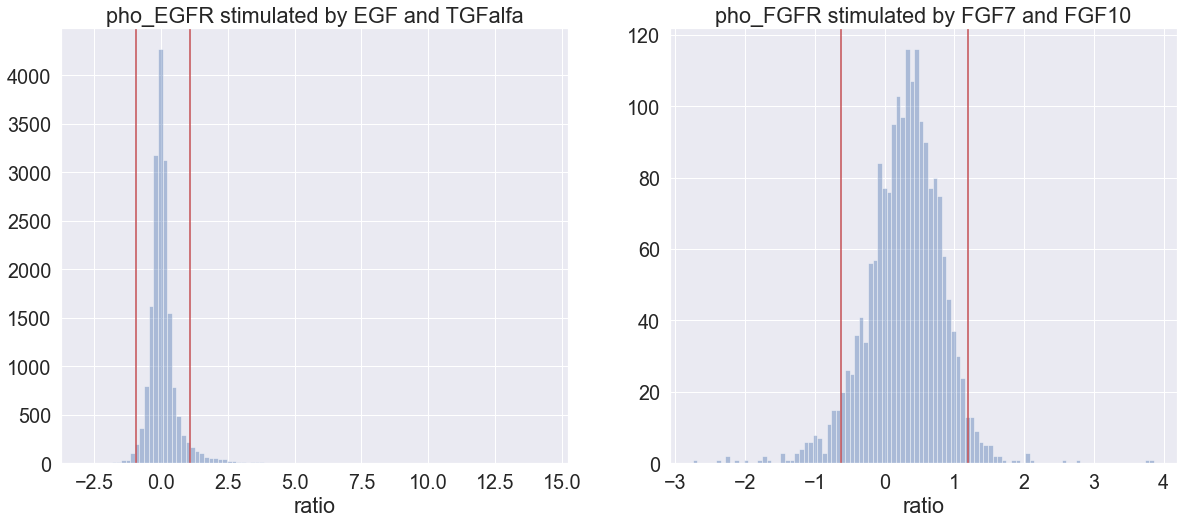

In [9]:
%matplotlib inline
plt.subplots(figsize = (20, 8))
sns.set(font_scale = 1.8)

trans_EGFR = plot_pho_EGFR.copy()
trans_EGFR['ratio'] = trans_EGFR['ratio'].apply(np.log2)
plt.subplot(121)
ax = sns.distplot(trans_EGFR['ratio'], hist=True, kde=False, 
             bins=100)
mu_EGFR = np.mean(trans_EGFR['ratio'])
std_EGFR  = np.std(trans_EGFR['ratio'])
EGF_thres_compute = [norm.ppf(0.05, loc = mu_EGFR, scale = std_EGFR), norm.ppf(0.95, loc = mu_EGFR, scale = std_EGFR)]
plt.axvline(EGF_thres_compute[0], 0,1, c='r')
plt.axvline(EGF_thres_compute[1], 0,1, c='r')

plt.title('pho_EGFR stimulated by EGF and TGFalfa')


plt.subplot(122)
trans_FGFR = plot_pho_FGFR.copy()
trans_FGFR['ratio'] = trans_FGFR['ratio'].apply(np.log2)
ax = sns.distplot(trans_FGFR['ratio'], hist=True, kde=False, 
             bins=100)
mu_FGFR = np.mean(trans_FGFR['ratio'])
std_FGFR  = np.std(trans_FGFR['ratio'])
FGF_thres_compute = [norm.ppf(0.05, loc = mu_FGFR, scale = std_FGFR), norm.ppf(0.95, loc = mu_FGFR, scale = std_FGFR)]
plt.axvline(FGF_thres_compute[0], 0,1, c='r')
plt.axvline(FGF_thres_compute[1], 0,1, c='r')

plt.title('pho_FGFR stimulated by FGF7 and FGF10')

In [10]:
EGF_thres_origin = [np.log2(0.5), np.log2(2)]
EGF_thres_compute = [norm.ppf(0.05, loc = mu_EGFR, scale = std_EGFR), norm.ppf(0.95, loc = mu_EGFR, scale = std_EGFR)]
print('Low threshold for EGFR:\t{0},\thigh threshold for EGFR:\t{1}'
      .format(EGF_thres_compute[0], EGF_thres_compute[1]))
print('Original low threshold:\t{0},\thigh threshold:\t{1}'
     .format(EGF_thres_origin[0], EGF_thres_origin[1]))

Low threshold for EGFR:	-0.9355332618886653,	high threshold for EGFR:	1.0775011680634308
Original low threshold:	-1.0,	high threshold:	1.0


### Conclusion:

1. Log2 transform was used to convert all data all time points from Poison distribution to Gaussian distribution, so that the double-threshold method can work.

2. The thresholds were determined according to the 0.05 and 0.95 quantiles of the fitted Gaussian distribution.

# New Data Practice

### 1. Trim the MaxQuant file

In [11]:
col_map = {
    'EGF_lo': 'Ratio M/L normalized STY_E',
    'FGF_lo': 'Ratio M/L normalized STY_F',
    'EGF_hi': 'Ratio H/L normalized STY_E',
    'FGF_hi': 'Ratio H/L normalized STY_F'
}
time_series = ['001', '008', '040', '120']

trimmed = trim('./data/Phospho (STY)Sites.txt', time_series, col_map)
trimmed.to_csv('./data/newData.csv', index = None)
trimmed

,id,protein,protein.names,gene.symbol,amino.acid,position,sequence,EGF_lo_001,EGF_lo_008,EGF_lo_040,...,FGF_lo_040,FGF_lo_120,EGF_hi_001,EGF_hi_008,EGF_hi_040,EGF_hi_120,FGF_hi_001,FGF_hi_008,FGF_hi_040,FGF_hi_120
1,0-S31,A0A024R4E5,Vigilin,HDLBP,S,31.0,RSGLVPQQIKVATLNSEEESDPPTYKDAFPP,1.020150,1.015050,1.037040,...,1.093350,1.074950,0.962325,0.950505,0.529042,0.917235,0.326485,0.950820,1.05320,0.967255
2,3-S171,G5E9B5,TCF3 fusion partner,TFPT,S,171.0,TLSPPRRTPAPPEPGSPAPGEGPSGRKRRRV,NaN,1.223750,1.012180,...,NaN,NaN,NaN,0.974135,1.003110,NaN,NaN,NaN,NaN,NaN
3,4-S1075,A0A024RCR6,Large proline-rich protein BAG6,BAT3,S,1075.0,AVSRAAKAAGARPLTSPESLSRDLEAPEVQE,0.821055,1.059450,1.445900,...,0.849350,0.894930,0.918935,1.158850,0.617732,NaN,2.578900,0.965375,0.94330,0.836405
4,6-S113,A0A024RCR6,Large proline-rich protein BAG6,BAT3,S,113.0,ASSGTGSASATHGGGSPPGTRGPGASVHDRN,0.810620,0.840195,0.803110,...,0.752845,0.834400,0.863540,0.847065,0.467146,0.860565,NaN,0.810375,0.79388,0.863665
5,7-S958,A0A024RCR6,Large proline-rich protein BAG6,BAT3,S,958.0,PLPEEPMEVQGAERASPEPQRENASPAPGTT,0.795025,0.909400,0.822685,...,NaN,NaN,0.815555,0.936965,0.518390,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5275,10325-Y321,Q13627-3,Dual specificity tyrosine-phosphorylation-regu...,DYRK1A,Y,321.0,VDFGSSCQLGQRIYQYIQSRFYRSPEVLLGM;VDFGSSCQLGQRIY...,0.948640,0.964140,1.130260,...,0.988795,0.915305,0.968415,1.006990,0.578865,1.048450,0.929685,0.795685,1.01087,0.860520
5276,10330-Y182,Q16539,Mitogen-activated protein kinase 14,MAPK14,Y,182.0,LDFGLARHTDDEMTGYVATRWYRAPEIMLNW,NaN,0.908310,0.845770,...,0.688845,NaN,NaN,0.884555,NaN,NaN,NaN,4.111400,0.60093,NaN
5277,10339-Y222,Q92796-3,Disks large homolog 3,DLG3,Y,222.0,HTTRPRRDNEVDGQDYHFVVSREQMEKDIQD,3.327050,9.012200,6.254500,...,NaN,NaN,6.982750,10.487500,4.546980,NaN,NaN,NaN,NaN,NaN
5278,10347-Y41,Q96QD8,Sodium-coupled neutral amino acid transporter 2,SLC38A2,Y,41.0,FNYSYPTKQAALKSHYADVDPENQNFLLESN,1.164300,1.288000,0.981230,...,1.138690,1.254750,1.592000,1.598450,1.217225,1.770900,NaN,1.836550,1.50100,1.749250


### 2. Separate the trimmed data by condition

In [12]:
conditions = ['EGF_lo', 'EGF_hi', 'FGF_lo', 'FGF_hi']
time_indices = ['1`', '8`', '40`', '120`']
datasets = orga_new_data(trimmed, conditions, time_indices)

Check the data format, e.g.: EGF low concentration

In [13]:
datasets['EGF_lo']

,id,1`,8`,40`,120`
1,0-S31,1.020150,1.015050,1.037040,0.991900
4,6-S113,0.810620,0.840195,0.803110,0.754605
6,8-S967,0.880540,0.871570,0.947945,0.827520
7,9-S1111,0.903015,0.650500,0.715400,0.717490
10,13-S149,1.419100,2.990250,3.207550,1.252950
...,...,...,...,...,...
5268,10300-Y187,10.366650,9.791900,8.290800,3.608950
5270,10304-Y772,1.050150,1.879100,1.469250,1.934050
5273,10320-Y849,1.250000,1.195200,1.214500,1.184100
5275,10325-Y321,0.948640,0.964140,1.130260,0.868975


### 3. Transform data (default: log2)

In [14]:
transformed = {}
for c in conditions:
    transformed[c] = transform(datasets[c])

The plots indicate the existence of outliers.

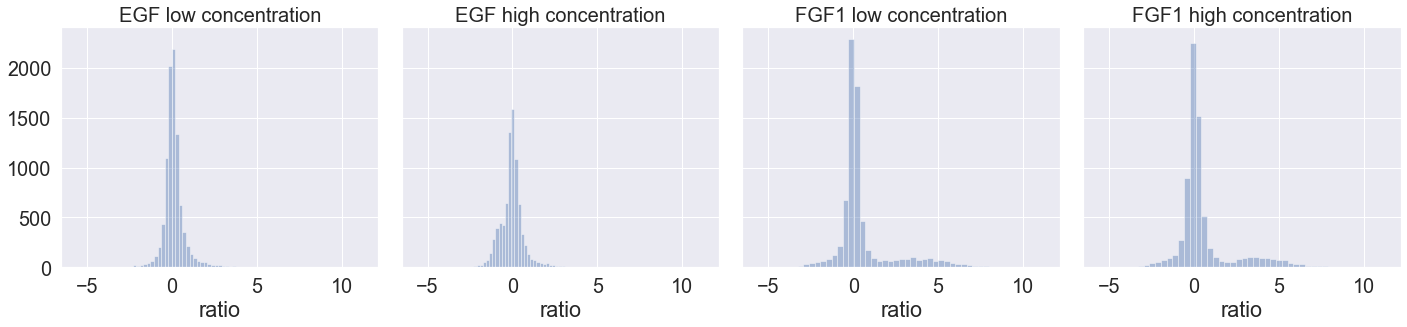

In [15]:
%matplotlib inline
sns.set(font_scale = 1.8)

titles = ['EGF low concentration', 'EGF high concentration', 'FGF1 low concentration', 'FGF1 high concentration']
fig, axn = plt.subplots(1, 4, sharex=True, sharey=True, figsize = (20, 5))
for i, ax in enumerate(axn.flat):
    plot_dist(transformed[conditions[i]], titles[i], ax)
fig.tight_layout()

Check the outliers using Pearson's correlation matrix

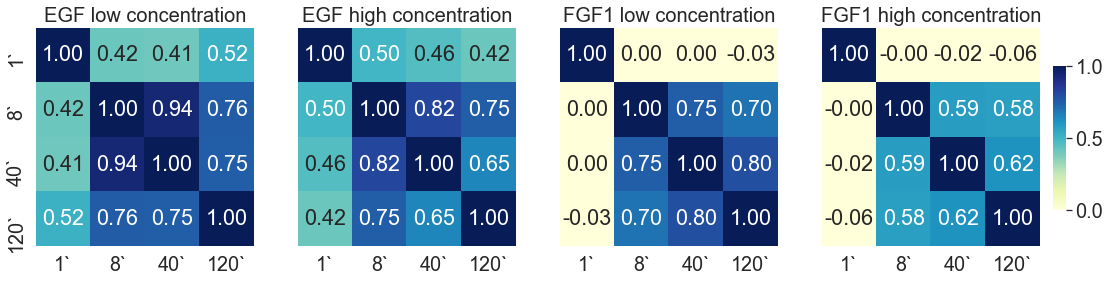

In [16]:
%matplotlib inline
sns.set(font_scale = 1.8)
    
fig, axn = plt.subplots(1, 4, sharex=True, sharey=True, figsize = (18, 5))
cbar_ax = fig.add_axes([.91, .3, .01, .4])   
for i, ax in enumerate(axn.flat):
    plot_corr_matrix(transformed[conditions[i]].iloc[:, 1:], titles[i], ax, i, cbar_ax)

Remove Column 1\` and check the distribution again

Imply the thresholds

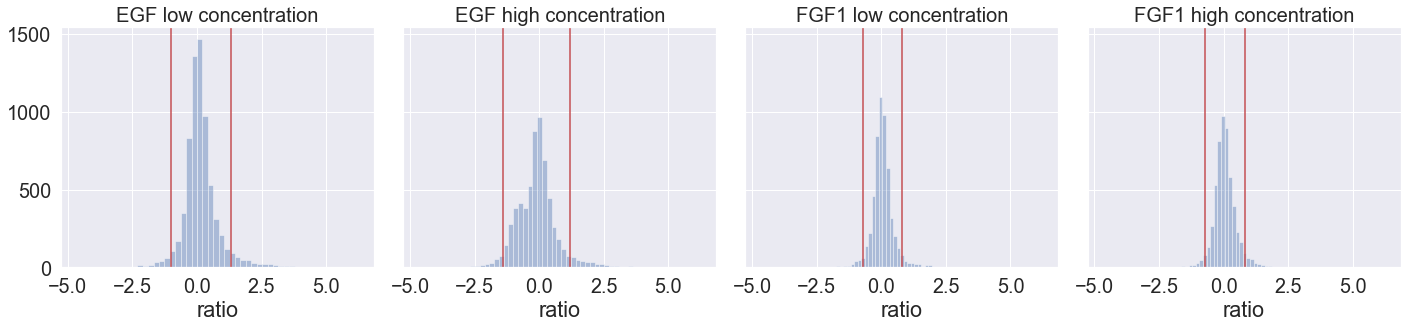

In [17]:
%matplotlib inline
sns.set(font_scale = 1.8)

thres = {}
for c in conditions:
    if '1`' in transformed[c].columns:
        transformed[c] = transformed[c].drop(columns = ['1`'])
fig, axn = plt.subplots(1, 4, sharex=True, sharey=True, figsize = (20, 5))
for i, ax in enumerate(axn.flat):
    thres[conditions[i]] = plot_dist(transformed[conditions[i]], titles[i], ax, True)
fig.tight_layout()

In [18]:
for c in conditions:
    print('Thresholds for {0}: {1}, {2}'.format(c, thres[c][0], thres[c][1]))

Thresholds for EGF_lo: -1.0173180775187571, 1.3091689764425745
Thresholds for EGF_hi: -1.390062509167301, 1.2028902659789416
Thresholds for FGF_lo: -0.7145190433817528, 0.8054219502844004
Thresholds for FGF_hi: -0.7168987224022382, 0.831906144233611


### 4. Filter the regulated sites

Check the regulated sites in EGF low concentration as an example

In [19]:
regulated = {}
for c in conditions:
    regulated[c] = identify_regulated(transformed[c], thres[c])
    regulated[c]['condition'] = [c] * regulated[c].shape[0]
regulated['EGF_lo']

,id,8`,40`,120`,condition
10,13-S149,1.580266,1.681472,0.325329,EGF_lo
40,66-S107,1.626743,1.921189,1.667461,EGF_lo
93,166-S118,3.980482,4.020013,2.748365,EGF_lo
95,175-S101,2.918672,2.826803,3.285262,EGF_lo
150,252-S987,1.488361,1.347666,1.128689,EGF_lo
...,...,...,...,...,...
5202,10122-T1003,-1.648010,-0.759429,-0.760675,EGF_lo
5253,10265-Y317,3.169997,3.601162,1.431596,EGF_lo
5259,10279-Y1172,4.156437,4.374170,1.781045,EGF_lo
5267,10299-Y204,3.023894,2.638364,1.413784,EGF_lo


#### Table 1 in the report

In [20]:
cols = ['Lower thres', 'Upper thres', 'No. of sites', 'No. of regulated sites']
indices = ['EGF low', 'EGF high', 'FGF1 low', 'FGF1 high']
con_idx_map = dict(zip(conditions, indices))
table1 = pd.DataFrame(columns = cols, index = indices)
for c in conditions:
    table1['Lower thres'][con_idx_map[c]] = thres[c][0]
    table1['Upper thres'][con_idx_map[c]] = thres[c][1]
    table1['No. of sites'][con_idx_map[c]] = transformed[c].shape[0]
    table1['No. of regulated sites'][con_idx_map[c]] = regulated[c].shape[0]
table1

,Lower thres,Upper thres,No. of sites,No. of regulated sites
EGF low,-1.01732,1.30917,2333,287
EGF high,-1.39006,1.20289,2088,345
FGF1 low,-0.714519,0.805422,1833,239
FGF1 high,-0.716899,0.831906,1830,290


#### Table 2 in the report and test results

In [21]:
sum_EGF = sum(table1['No. of regulated sites'][:2])
sum_FGF = sum(table1['No. of regulated sites'][2:])
table2a = pd.DataFrame([[sum_EGF, sum(table1['No. of sites'][:2]) - sum_EGF],
                       [sum_FGF, sum(table1['No. of sites'][2:]) - sum_FGF]],
                        columns = ['regulated', 'unregulated'], index = ['EGF', 'FGF1'])
print(chi2_contingency(table2a.values)[1])
table2a

0.8769270329460489


,regulated,unregulated
EGF,632,3789
FGF1,529,3134


In [22]:
regulated_low = table1['No. of regulated sites'][0] + table1['No. of regulated sites'][2]
regulated_high = table1['No. of regulated sites'][1] + table1['No. of regulated sites'][3]
unregulated_low = table1['No. of sites'][0] + table1['No. of sites'][2] - regulated_low
unregulated_high = table1['No. of sites'][1] + table1['No. of sites'][3] - regulated_high
table2b = pd.DataFrame([[regulated_low, unregulated_low],
                       [regulated_high, unregulated_high]],
                      columns = ['regulated', 'unregulated'], index = ['Low (5 ng/mL)', 'High (100 ng/mL)'])
print(chi2_contingency(table2b.values)[1])
table2b

5.193809833893717e-06


,regulated,unregulated
Low (5 ng/mL),526,3640
High (100 ng/mL),635,3283


### 5. Append Column 0\` and standardise

In [23]:
all4cons = pd.concat(list(regulated.values()), ignore_index=True)
all4cons.insert(1, '0`', np.zeros(all4cons.shape[0]))
all4cons.iloc[:, 1:5] = standardise(all4cons.iloc[:, 1:5].to_numpy())
all4cons

,id,0`,8`,40`,120`,condition
0,13-S149,-1.205462,0.918781,1.054825,-0.768145,EGF_lo
1,66-S107,-1.712921,0.424201,0.811027,0.477693,EGF_lo
2,166-S118,-1.645030,0.791698,0.815898,0.037434,EGF_lo
3,175-S101,-1.717248,0.502763,0.432885,0.781600,EGF_lo
4,252-S987,-1.690181,0.847806,0.607889,0.234486,EGF_lo
...,...,...,...,...,...,...
1156,10013-T433,-1.141437,1.585920,-0.426200,-0.018283,FGF_hi
1157,10122-T1003,1.624833,-0.711123,0.010473,-0.924183,FGF_hi
1158,10144-T866,0.589775,0.395072,0.734590,-1.719436,FGF_hi
1159,10299-Y204,-1.470548,1.352540,0.034904,0.083104,FGF_hi


In [24]:
all4cons.to_csv('./data/all4cons.csv', index = None)

Save a copy including 1\' for the use of Parzen window clasifier

In [25]:
transformed_1 = {}
for c in conditions:
    transformed_1[c] = transform(datasets[c]) 
    transformed_1[c].insert(1, '0`', np.zeros(transformed_1[c].shape[0]))
    transformed_1[c].iloc[:, 1:6] = standardise(transformed_1[c].iloc[:, 1:6].to_numpy())
    transformed_1[c] = transformed_1[c][transformed_1[c]['id'].isin(regulated[c].id)]
    transformed_1[c]['condition'] = [c] * transformed_1[c].shape[0]
all4cons_1 = pd.concat(list(transformed_1.values()), ignore_index=True)
all4cons_1.to_csv('./data/all4cons_cp.csv', index = None)

In [26]:
all4cons_1

,id,0`,1`,8`,40`,120`,condition
0,13-S149,-1.197224,-0.458510,1.114498,1.262548,-0.721311,EGF_lo
1,66-S107,-1.555665,-0.799337,0.634579,1.031021,0.689402,EGF_lo
2,166-S118,-1.203392,-1.165348,1.010700,1.032689,0.325351,EGF_lo
3,175-S101,-1.184293,-1.251923,0.751342,0.690415,0.994460,EGF_lo
4,252-S987,-1.220865,-1.190442,1.059288,0.843744,0.508275,EGF_lo
...,...,...,...,...,...,...,...
1156,10013-T433,-1.048408,1.757563,0.406781,-0.666791,-0.449146,FGF_hi
1157,10122-T1003,-0.280971,1.985878,-0.590784,-0.495080,-0.619042,FGF_hi
1158,10144-T866,0.254547,1.144664,0.076041,0.387315,-1.862567,FGF_hi
1159,10299-Y204,-0.253515,-1.806690,1.100271,0.468410,0.491524,FGF_hi
